<a href="https://colab.research.google.com/github/stephsallum/astr21/blob/main/sections6to8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASTR21 Winter 2025 Sections 6 to 8 Notebook

In this notebook we're going to get to know exoplanet transits a bit better! We'll start off by using PyTransit to create some lightcurves for different planet parameters. Once we've gained some intuition for how planet orbital periods and radii change the shape of the lightcurves, we'll examine a real transit lightcurve. By looking at the lightcurve, we'll guess the planet radius and orbital period. Then we'll make a plot with the real lightcurve and a fake one (with that radius and orbital period) to see how well they agree!

## Making fake transit lightcurves with PyTransit

First, let's install PyTransit so that it's available.

In [1]:
pip install pytransit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 724.6/724.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.8/92.8 kB 3.8 MB/s eta 0:00:00


In [2]:
from pytransit import create_mock_light_curve
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from matplotlib import rc

/usr/local/lib/python3.11/dist-packages/pytools/persistent_dict.py:52: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Now let's define a function that uses PyTransit to create a fake transit and plot it. We'll make plotting optional so that we can use this to only return time and brightness information later.

In [3]:
def make_fake_transit(period, radius, plot=False, noise=0, lclength=2.5):
  """
  This function takes a planet orbital period in days (period), and a planet
  radius in units of stellar radii (radius), and returns a lightcurve as two
  arrays: time (the time in days) and flux (the brightness of the star
  normalized by its maximum value). If you set plot=True the function will
  display a plot. If you set noise to some value, it will add noise to the
  lightcurve. If you set lclength to some value, the lightcurve will cover that
  number of orbital periods.
  """

  time, flux, true_pars = create_mock_light_curve(tobs=period*lclength*24,texp=60,
                                                  passband='TESS',
                                                  noise=noise,
                                                  transit_pars={'period':period,
                                                                'ror':radius})
  if plot==True:
    rc('figure', figsize=(13,5))
    with sb.axes_style('white'):
      fig, ax = plt.subplots()
      ax.plot(time, flux, '.')
      plt.setp(ax, xlim=time[[0,-1]], title='A mock transit light curve observed in TESS band',
          xlabel='Time [d]', ylabel='Normalised flux')
      fig.tight_layout()
      plt.show()
  return time, flux

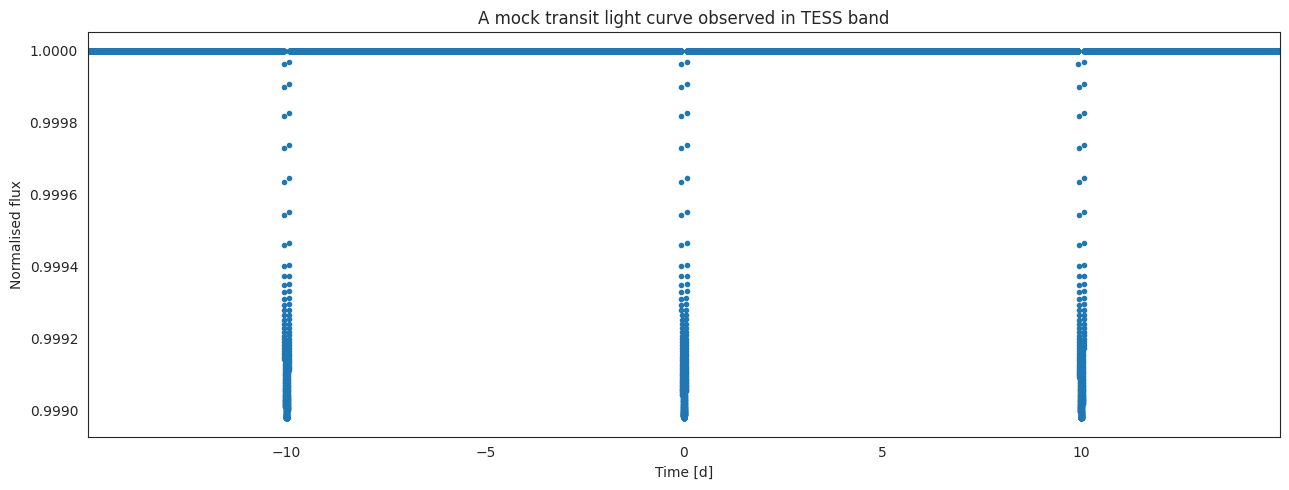

In [69]:
#Let's plot an example noiseless lightcurve for a planet with an orbital
#period of 2.3 days, and a radius of 0.1 stellar radii.

time, flux = make_fake_transit(10,0.03, plot=True, noise=0, lclength=3)

### Generate some fake light curves!

Take the next few cells to make three plots of fake lightcurves. Vary the planet orbital period and radius relative to the star. Feel free to change the optional parameters like the number of orbital periods represented in the lightcurve (lclength), and the amount of noise to add (noise). To do this, modify the parameters in the make_fake_transit calls in the next three cells.

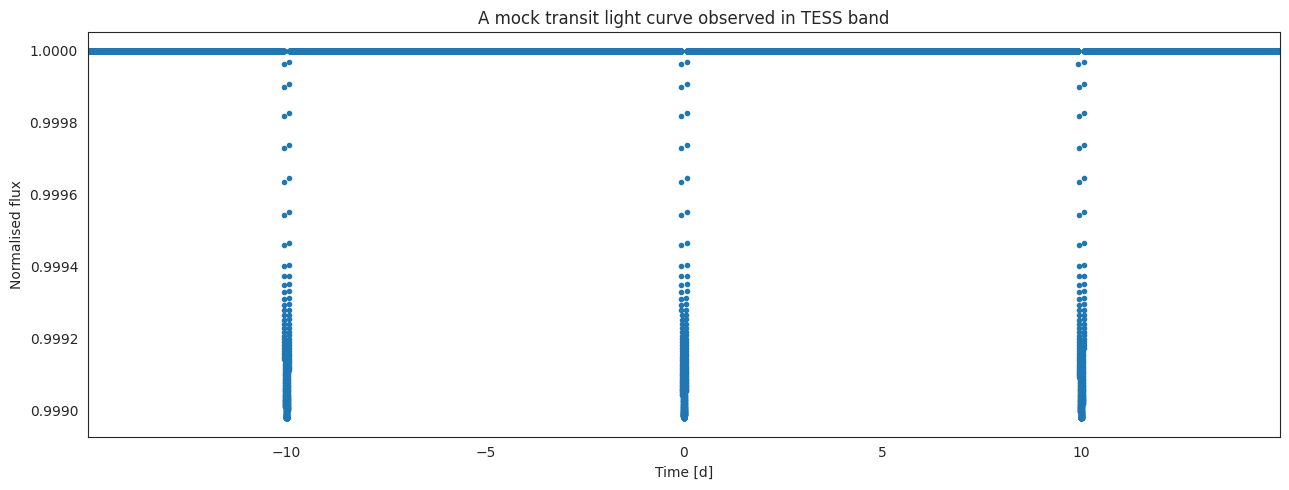

In [70]:
time, flux = make_fake_transit(10,0.03, plot=True, noise=0, lclength=3)

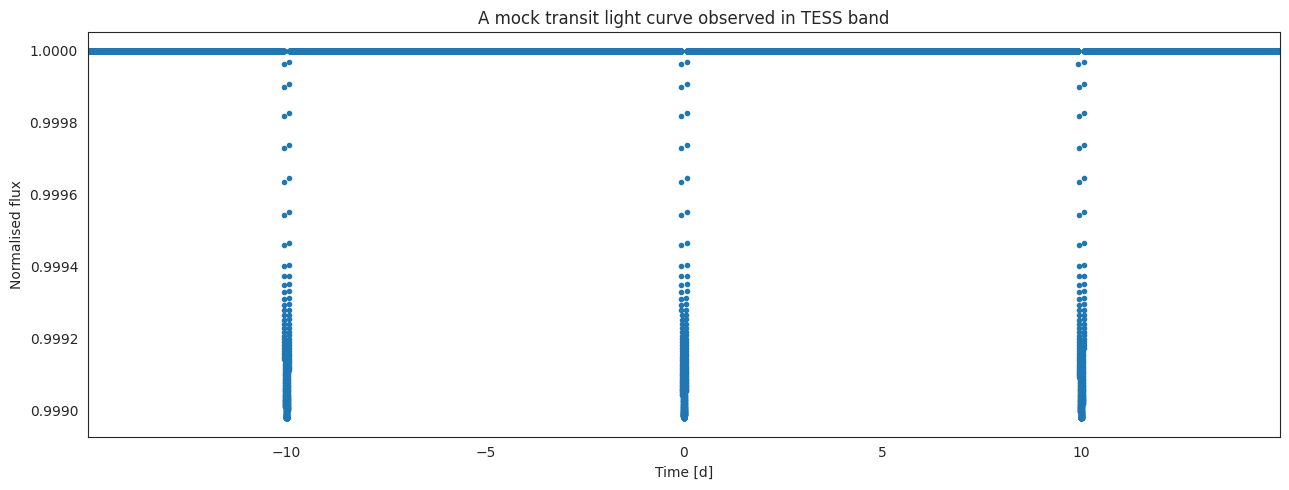

In [71]:
time, flux = make_fake_transit(10,0.03, plot=True, noise=0, lclength=3)

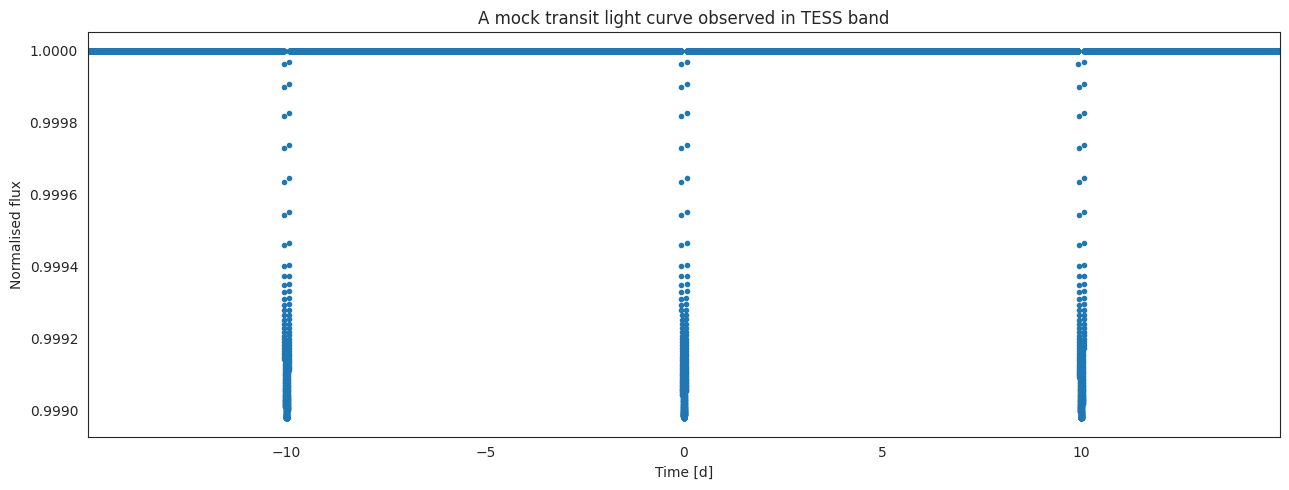

In [72]:
time, flux = make_fake_transit(10,0.03, plot=True, noise=0, lclength=3)

## Plotting a real transit lightcurve!

In [9]:
!wget https://github.com/stephsallum/astr21/raw/refs/heads/main/secs6to8_data.zip
!unzip secs6to8_data.zip

--2025-03-02 18:49:38--  https://github.com/stephsallum/astr21/raw/refs/heads/main/secs6to8_data.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/stephsallum/astr21/refs/heads/main/secs6to8_data.zip [following]
--2025-03-02 18:49:38--  https://raw.githubusercontent.com/stephsallum/astr21/refs/heads/main/secs6to8_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32418 (32K) [application/zip]
Saving to: ‘secs6to8_data.zip.1’

secs6to8_data.zip.1 100%[===================>]  31.66K  --.-KB/s    in 0.004s  

2025-03-02 18:49:38 (8.83 MB/s) - ‘secs6to8_data.zip.1’ saved [32418/32418]

Archiv

Let's load a section of the lightcurve and then plot it!

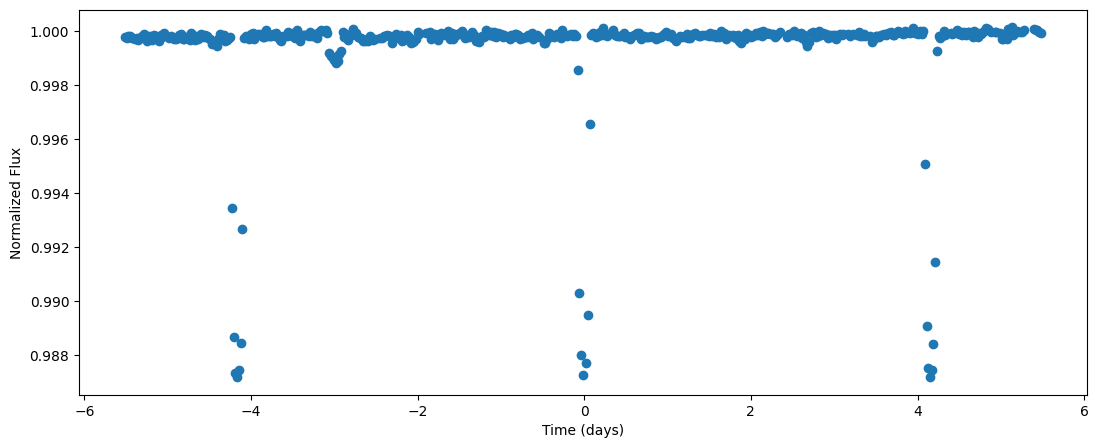

In [45]:
lc = np.loadtxt('secs6to8_data/kepler_lightcurve.txt',skiprows=1,delimiter=',',usecols=range(2))
time_kepler = lc[290:780,0]-2158.3
flux_kepler = lc[290:780,1]

plt.scatter(time_kepler,flux_kepler)
plt.ylabel('Normalized Flux')
plt.xlabel('Time (days)')
plt.show()

Taking a look at this lightcurve, guess the orbital period and the planet radius relative to the star's radius! Feel free to use the xlim command in the cell below to make a new plot where you zoom in on different features. I'm showing an example where I zoom in on the first transit around a time of -4.5 days.

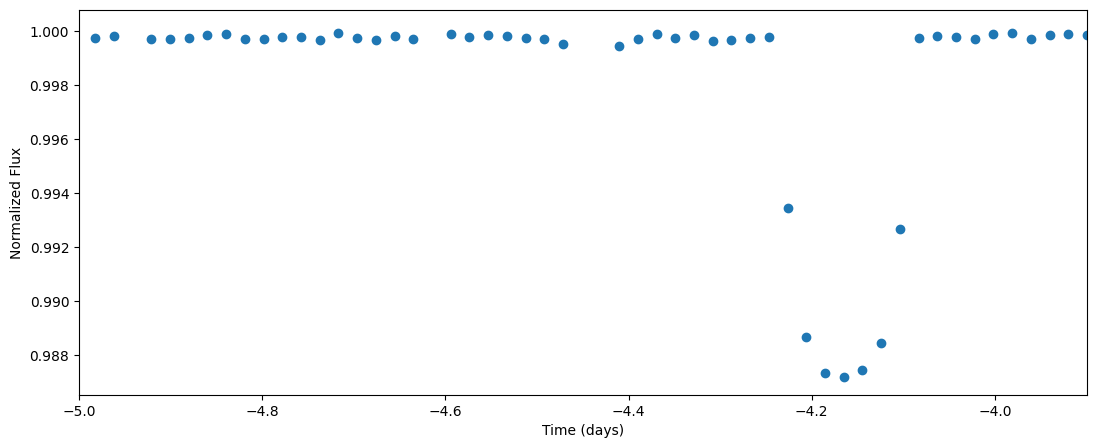

In [46]:
plt.scatter(time_kepler,flux_kepler)
plt.xlim(-5,-3.9)
plt.ylabel('Normalized Flux')
plt.xlabel('Time (days)')
plt.show()

## Comparing our real and fake lightcurves!

Once you've got a guess at an orbital period and a radius, make a fake lightcurve using the cell below, but this time without plotting the fake lightcurve! Be sure to set noise=0 so that we're comparing the Kepler data to a perfect model!

In [74]:
time, flux = make_fake_transit(2,0.05, plot=False, noise=0, lclength=3)

Now let's make a plot where we show the fake lightcurve on top of the real one! Can you keep adjusting your parameters above in order to make the two match up? Feel free to change the x limits so that you can tell whether the transit depths match in addition to the orbital period!

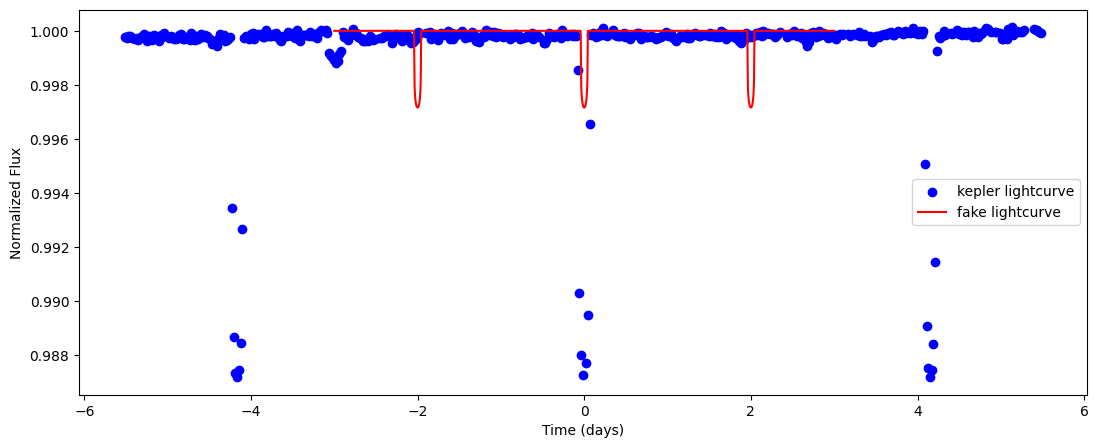

In [75]:
plt.scatter(time_kepler,flux_kepler,c='b',label='kepler lightcurve')
#plot the fake curve as a line in order to make it easier to see the blue points
plt.plot(time, flux, c='r', label='fake lightcurve')
#plt.xlim(-5,-3.9)
plt.ylabel('Normalized Flux')
plt.xlabel('Time (days)')
plt.legend()
plt.show()

# Comparing our parameters to those of the real system!

Now that you've got the planet parameters, compare them to those of the real system! What is the planet's radius in units of Jupiter radii?